# Curva de notas de parciales

**Alumno:** VASQUEZ RAMOS, Jose Manuel

**Fecha:** 20/05/2025

___

## Contexto académico & objetivo

Dado un CSV con las calificaciones de 120 alumnos en tres parciales, usa hill climbing para encontrar el offset (entre –5 y +5 puntos) que maximiza el porcentaje de aprobados manteniendo el promedio de la clase ≤ 14.

## Indicaciones clave

1) Lee el archivo.
1) Define función de aptitud (porcentaje de aprobados penalizando si promedio > 14).
2) Itera intentando offsets aleatorios de 0.5 ptos y conserva el mejor. 4) Reporta offset óptimo y nueva distribución.

## Librerías

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Control de aleatoriedad

In [2]:
np.random.seed(42)
random.seed(42)

## Dataset

In [3]:
df = pd.read_csv("dataset/grades.csv")
df.head()

,StudentID,Parcial1,Parcial2,Parcial3
0,A001,17,10,18
1,A002,10,19,12
2,A003,5,5,13
3,A004,8,6,13
4,A005,16,7,14


## Función de aptitud

In [4]:
def fitness(offset, df):
    # Aplicar offset
    df_offset = df.copy()
    for col in ['Parcial1', 'Parcial2', 'Parcial3']:
        df_offset[col] = np.clip(df_offset[col] + offset, 0, 20)  # Mantener notas entre 0 y 20

    # Promedio por alumno
    df_offset['Promedio'] = df_offset[['Parcial1', 'Parcial2', 'Parcial3']].mean(axis=1)

    # Aprobados: promedio >= 11
    aprobados = (df_offset['Promedio'] >= 11).sum()
    porcentaje_aprobados = aprobados / len(df_offset) * 100

    # Promedio general de la clase
    promedio_clase = df_offset['Promedio'].mean()

    # Penalización si se excede 14
    if promedio_clase > 14:
        return 0  # penalización total
    return porcentaje_aprobados

## Vecindario

In [5]:
def get_neighbors(current_offset):
    step = 0.5
    neighbors = []
    if current_offset + step <= 5:
        neighbors.append(round(current_offset + step, 2))
    if current_offset - step >= -5:
        neighbors.append(round(current_offset - step, 2))
    return neighbors

## Hill Climbing

In [6]:
def hill_climb(df, max_iters=100):
    current = 0.0
    current_score = fitness(current, df)
    history = [(current, current_score)]

    for i in range(max_iters):
        neighbors = get_neighbors(current)
        next_candidate = max(neighbors, key=lambda o: fitness(o, df))
        next_score = fitness(next_candidate, df)

        if next_score > current_score:
            current, current_score = next_candidate, next_score
            history.append((current, current_score))
        else:
            break  # óptimo local alcanzado

    return current, current_score, history

## Ejecución

In [7]:
# Ejecutar
offset_optimo, score_optimo, historia = hill_climb(df)

# Aplicar offset óptimo
df_final = df.copy()
for col in ['Parcial1', 'Parcial2', 'Parcial3']:
    df_final[col] = np.clip(df_final[col] + offset_optimo, 0, 20)
df_final['Promedio'] = df_final[['Parcial1', 'Parcial2', 'Parcial3']].mean(axis=1)

## Reporte

In [8]:
print(f"Offset óptimo encontrado: {offset_optimo}")
print(f"Porcentaje de aprobados: {score_optimo:.2f}%")
print(f"Promedio general final: {df_final['Promedio'].mean():.2f}")

Offset óptimo encontrado: 2.0
Porcentaje de aprobados: 85.83%
Promedio general final: 13.62


## Histograma de notas

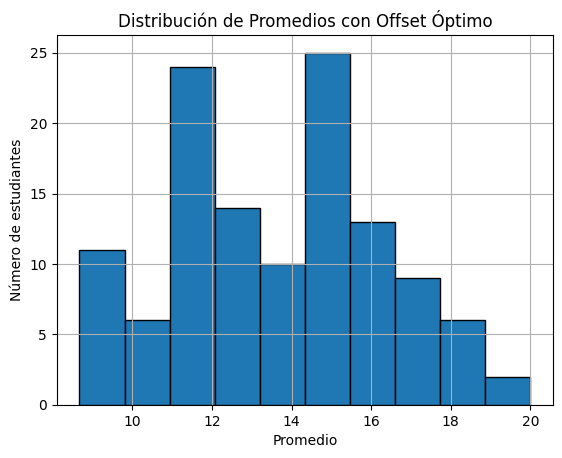

In [9]:
plt.hist(df_final['Promedio'], bins=10, edgecolor='black')
plt.title("Distribución de Promedios con Offset Óptimo")
plt.xlabel("Promedio")
plt.ylabel("Número de estudiantes")
plt.grid(True)
plt.show()

## Convergencia

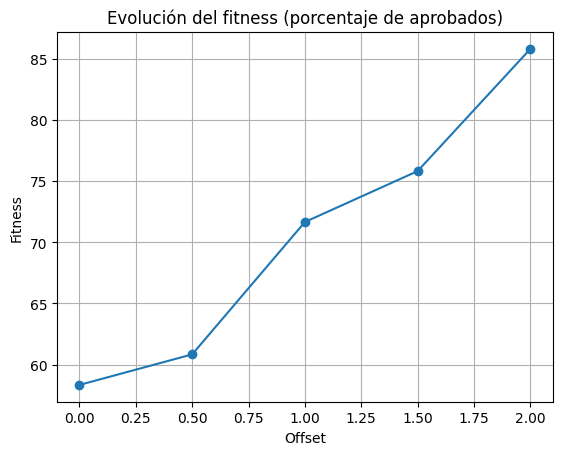

In [10]:
offsets, scores = zip(*historia)
plt.plot(offsets, scores, marker='o')
plt.title("Evolución del fitness (porcentaje de aprobados)")
plt.xlabel("Offset")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()